In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
# test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
# submission=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')
submission=pd.read_csv('./input/sample_submission.csv')

train.shape, test.shape, submission.shape

((1460, 81), (1459, 80), (1459, 2))

In [3]:
train_ID = train['Id']
test_ID = test ['Id']
train_result=train['SalePrice']
train_data=train.drop(["Id"],axis=1)
test_data=test.drop(["Id"],axis=1)

train_data.shape, train_result.shape, test_data.shape

((1460, 80), (1460,), (1459, 79))

# Data Analysis

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train.isnull().any().any()

True

In [8]:
train.duplicated().sum()

0

In [9]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## distribution of SalePrice

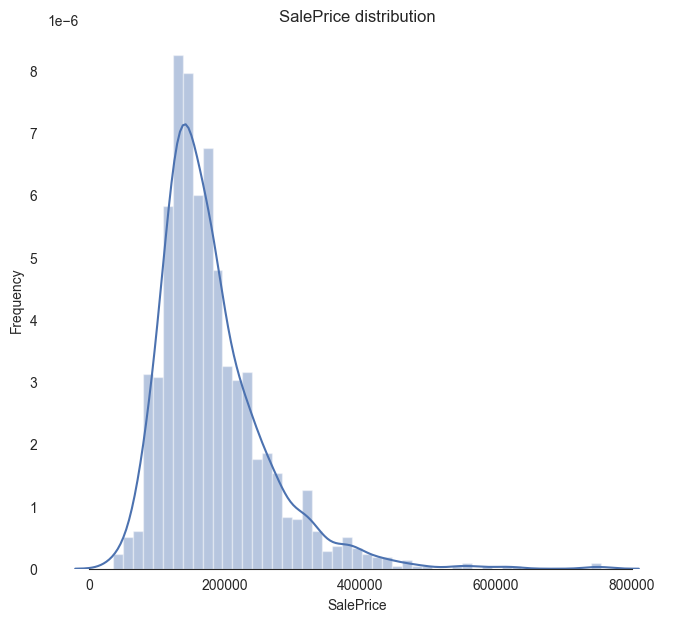

In [10]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
# Check the new distribution 
sns.distplot(train_data['SalePrice'], color="b", kde=True)
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

## log price calculation

In [11]:
# log(1+x) to all elements of the column SalePrice
logPrice = np.log1p(train_data['SalePrice']) 

train_data_log = train_data.copy()
train_data_log['logPrice'] = logPrice

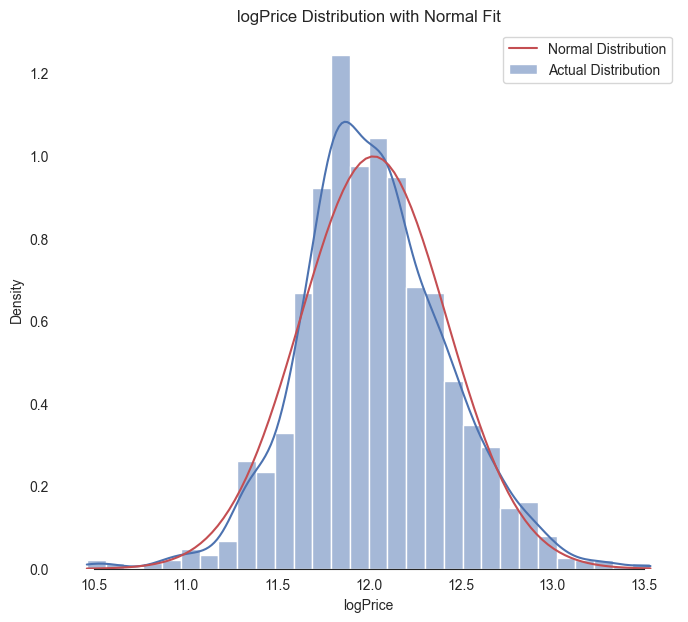

In [12]:
from scipy.stats import norm

sns.set_style("white")
sns.set_color_codes(palette='deep')

f, ax = plt.subplots(figsize=(8, 7))

# Check the new distribution
sns.histplot(train_data_log['logPrice'], color="b", kde=True, stat="density", bins=30, label="Actual Distribution")

# Fit a normal distribution
mean = train_data_log['logPrice'].mean()
std = train_data_log['logPrice'].std()
x = np.linspace(train_data_log['logPrice'].min(), train_data_log['logPrice'].max(), 100)
normal_dist = norm.pdf(x, mean, std)

# Add the normal distribution line
ax.plot(x, normal_dist, color="r", label="Normal Distribution")

# Customize plot
ax.xaxis.grid(False)
ax.set(ylabel="Density")
ax.set(xlabel="logPrice")
ax.set(title="logPrice Distribution with Normal Fit")
sns.despine(trim=True, left=True)
plt.legend()
plt.show()

## Missing values for train data & test data 

In [13]:
train_features = train_data.drop(["SalePrice"],axis=1)
combined_data = pd.concat([train_features, test_data], axis=0, ignore_index=True)

missing_values = combined_data.isna().sum()
missing_columns = (missing_values[missing_values > 0] / len(combined_data)) * 100
print(missing_columns.sort_values(ascending=False))

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageYrBlt      5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Functional       0.068517
Utilities        0.068517
GarageArea       0.034258
GarageCars       0.034258
Electrical       0.034258
KitchenQual      0.034258
TotalBsmtSF      0.034258
BsmtUnfSF        0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
SaleType         0.034258
dtype: float64


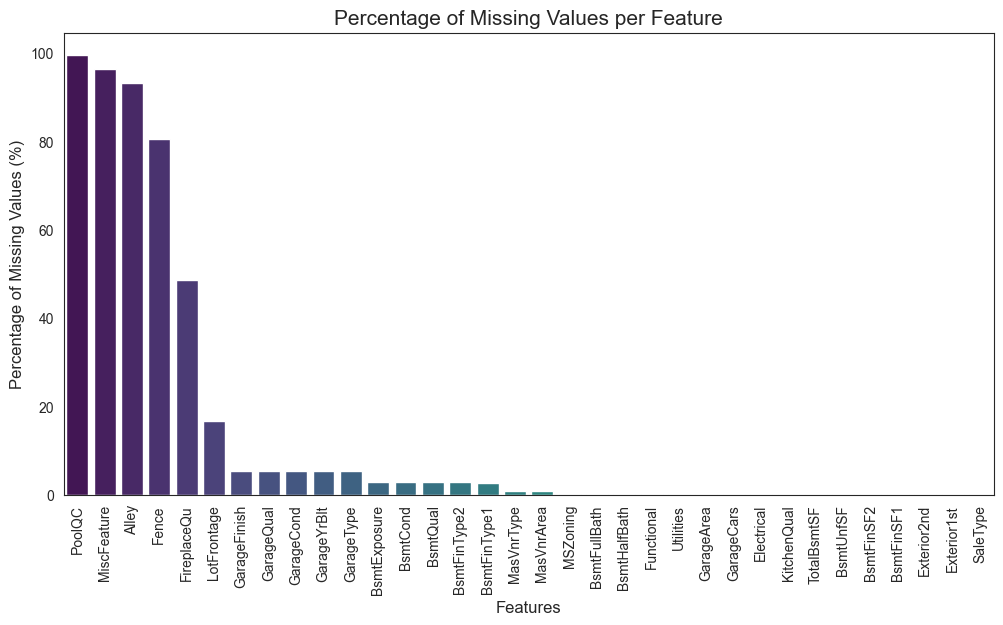

We can remove features with missing values that are more than 10%.


In [14]:
# only choose features that missing percentage > 0
missing_columns = missing_columns.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_columns.index, y=missing_columns.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percentage of Missing Values (%)', fontsize=12)
plt.title('Percentage of Missing Values per Feature', fontsize=15)
plt.show()
print('We can remove features with missing values that are more than 10%.')

seperate numeric columns and categorical columns

In [15]:
missing_columns_list = ['GarageFinish','GarageQual','GarageCond','GarageYrBlt','GarageType',
                   'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1',
                   'MasVnrArea','MSZoning','BsmtFullBath','Functional','Utilities','GarageArea',
                   'GarageCars','Electrical','KitchenQual','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2',
                   'BsmtFinSF1','Exterior2nd','Exterior1st','SaleType']

# functional - typical
# features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = [] # numeric features
categoric = [] # category features
for i in train.columns:
    # delete features with higher missing percentage(>10%)
    if i in ['PoolQC', 'MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','LotFrontage']:
        pass
    else:
        # seperate numeric feature & categorical features 
        if train[i].dtype in numeric_dtypes:
            numeric.append(i) 
            
        else:
            categoric.append(i)

# numeric, categoric

## detect outlier

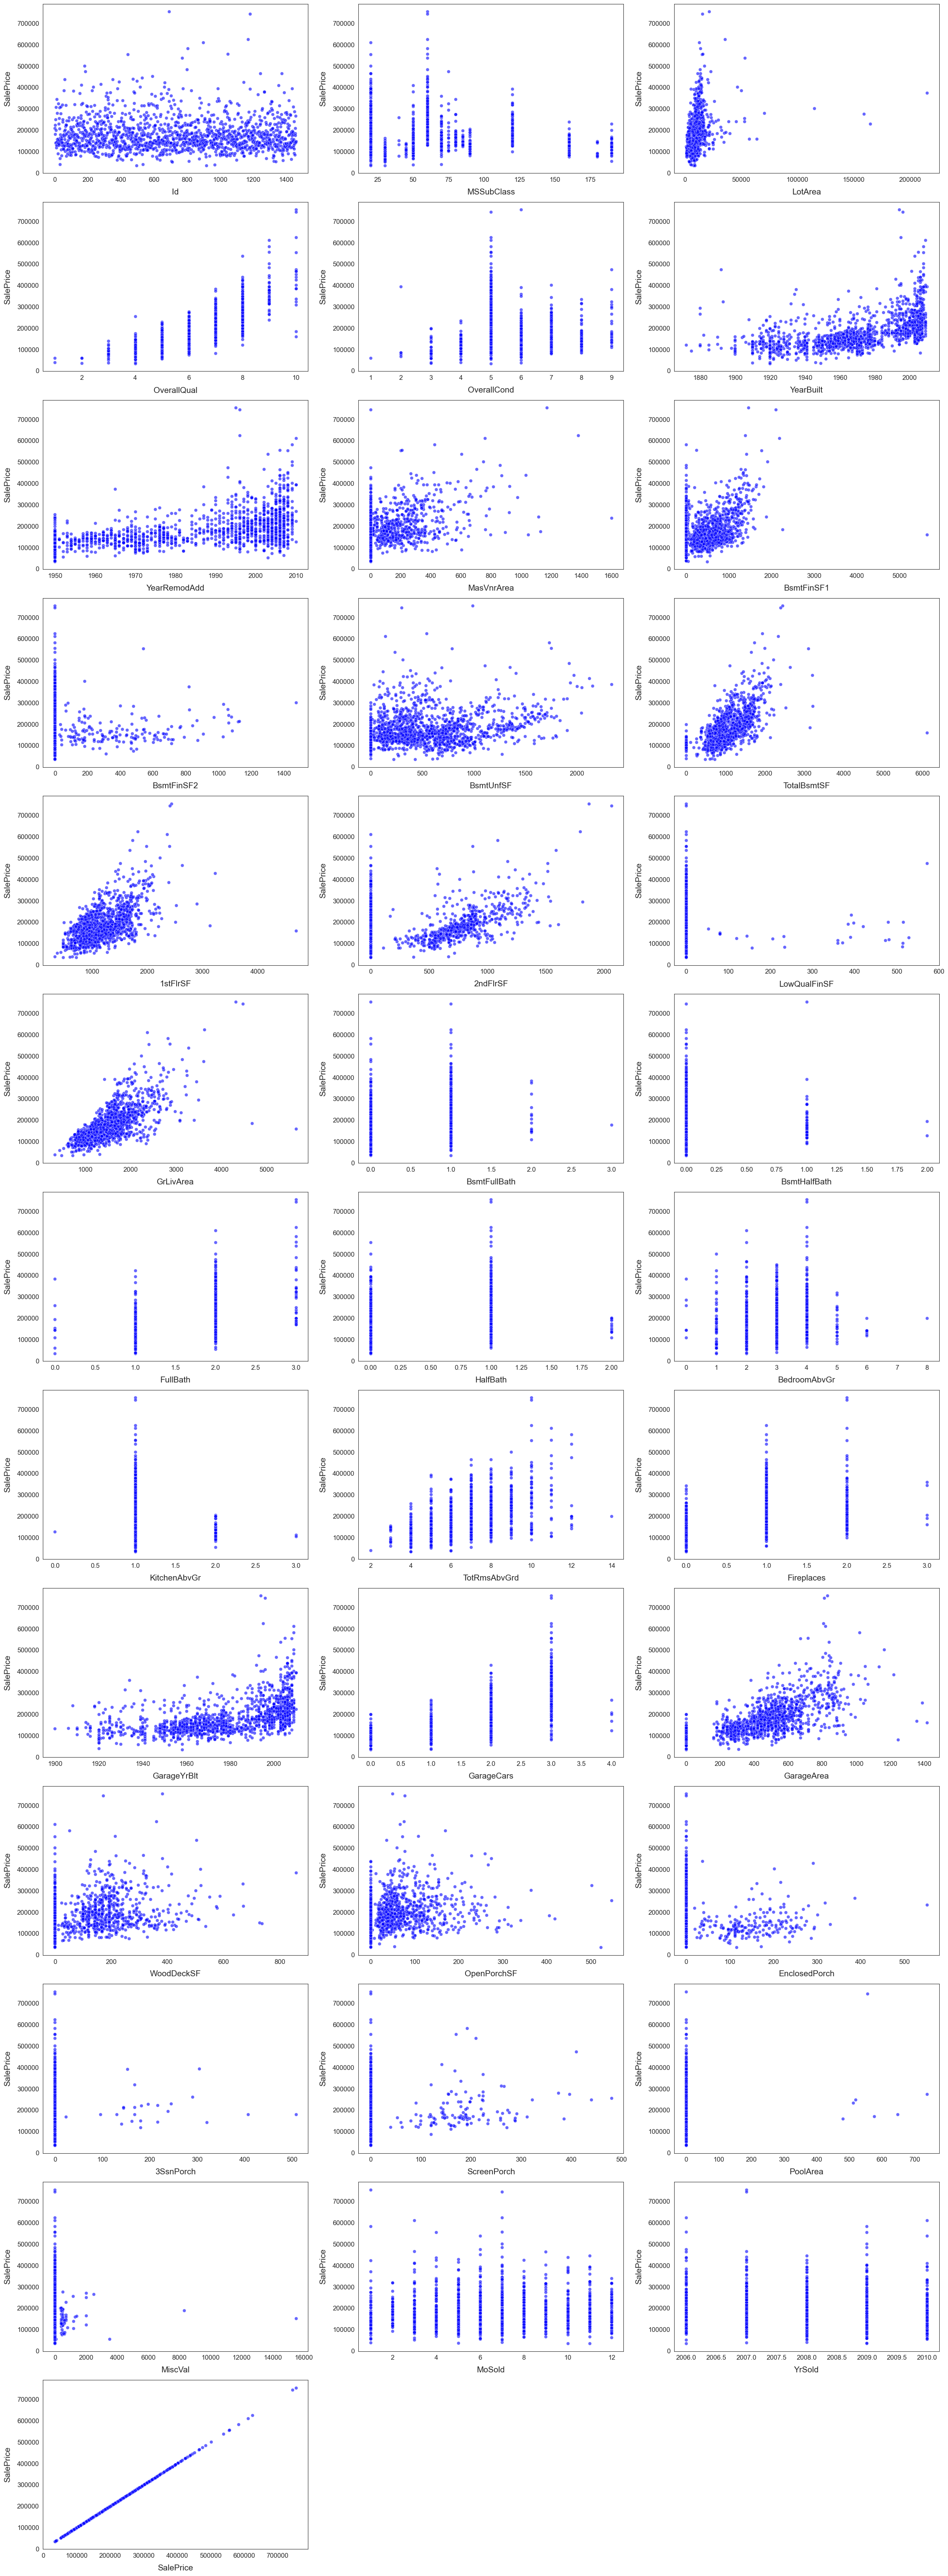

In [16]:
# Calculate number of rows and columns
ncols = 3
nrows = (len(numeric) // ncols) + (1 if len(numeric) % ncols != 0 else 0)

# Create subplots with larger height for each plot
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(24, nrows * 5))  # Increased height
axs = axs.flatten()  # Flatten for easy iteration

# Scatterplots for numeric features against SalePrice
for i, feature in enumerate(numeric):
    sns.scatterplot(x=feature, y='SalePrice', color='blue', alpha=0.6, data=train, ax=axs[i])
    axs[i].set_xlabel(feature, fontsize=15, labelpad=10)
    axs[i].set_ylabel('SalePrice', fontsize=15, labelpad=10)
    axs[i].tick_params(axis='x', labelsize=12)
    axs[i].tick_params(axis='y', labelsize=12)

# Remove unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

## Heat Map

<Axes: >

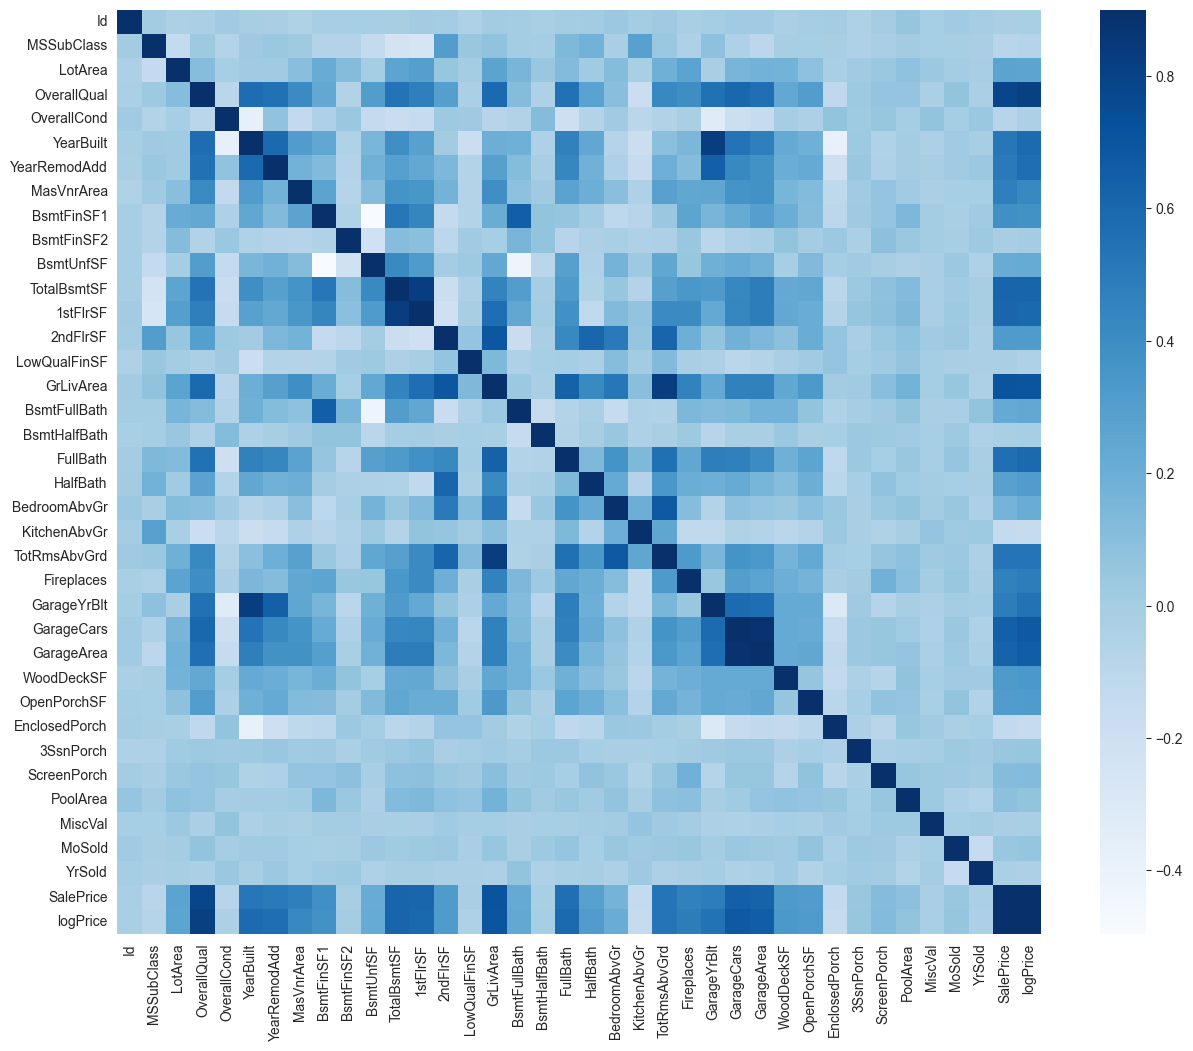

In [17]:
train_numeric_data = train[numeric]
train_numeric_data_log = train_numeric_data.copy()
train_numeric_data_log["logPrice"] = train_data_log['logPrice']
corr = train_numeric_data_log.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

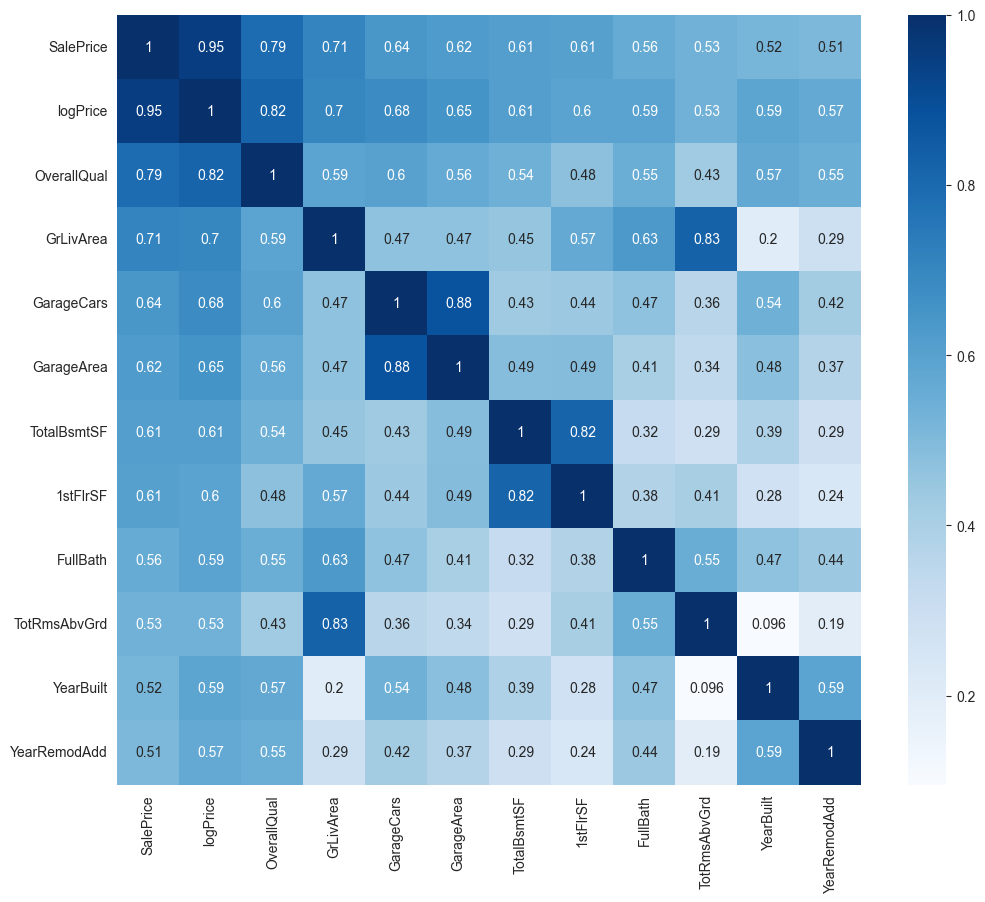

In [18]:
corr_matrix = train_numeric_data_log.corr()

target_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False)
top_10_features = target_corr.head(12).index
top_corr_matrix = train_numeric_data_log[top_10_features].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(top_corr_matrix, ax=ax, annot=True, cmap='Blues')
plt.show()

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

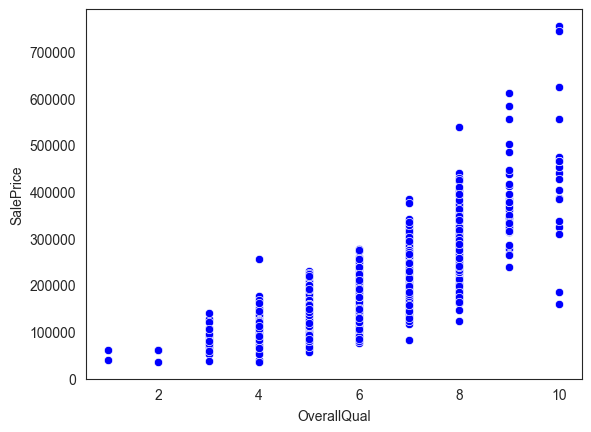

In [19]:
sns.scatterplot(x='OverallQual', y='SalePrice', color='blue', data=train)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

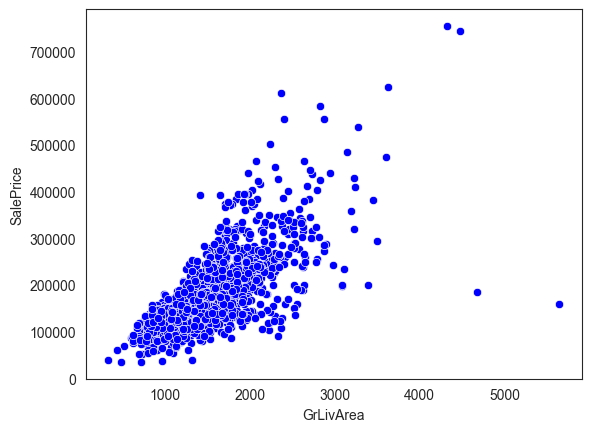

In [20]:
sns.scatterplot(x='GrLivArea', y='SalePrice', color='blue', data=train)

# Feature Engineering

## Remove outliers

In [21]:
train_data.drop(train_data[(train_data['OverallQual']<5) & (train_data['SalePrice']>200000)].index, inplace=True)
train_data.drop(train_data[(train_data['GrLivArea']>4500) & (train_data['SalePrice']<300000)].index, inplace=True)
train_data.reset_index(drop=True, inplace=True)
train_data.shape

(1457, 80)

## handle missing values

In [22]:
# def handle_missing(features):    
missing_columns_list = ['GarageFinish','GarageQual','GarageCond','GarageYrBlt','GarageType',  
                        'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1', 
                        'MasVnrArea','MSZoning',
                        'Functional',
                        'Utilities',
                        'GarageArea', 'GarageCars',
                        'Electrical',
                        'KitchenQual',
                        'TotalBsmtSF','BsmtUnfSF','BsmtFinSF2', 'BsmtFinSF1','BsmtFullBath',
                        'Exterior2nd','Exterior1st',
                        'SaleType']

# Drop features which missing values > 10%
train_result = train_data['SalePrice']
print(train_result.shape)
train_features = train_data.drop(['SalePrice'], axis=1)
test_features = test_data

features = pd.concat([train_features, test_features]).reset_index(drop=True)

# features = train_data.drop(['PoolQC', 'MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','LotFrontage'], axis=1)
    
# Delete false values
s=0
for i in range(len(features)):
    if not all([features['BsmtQual'].isnull()[i], features['BsmtExposure'].isnull()[i], features['BsmtFinType1'].isnull()[i], features['BsmtFinType2'].isnull()[i], features['BsmtCond'].isnull()[i]]) and not all(not v for v in [features['BsmtQual'].isnull()[i], features['BsmtExposure'].isnull()[i], features['BsmtFinType1'].isnull()[i], features['BsmtFinType2'].isnull()[i], features['BsmtCond'].isnull()[i]]):
        s+=1
        print(s,'\t', i,'\t', features['BsmtQual'].isnull()[i],'\t\t',
                features['BsmtExposure'].isnull()[i], '\t\t', features['BsmtFinType1'].isnull()[i],
            '\t\t', features['BsmtFinType2'].isnull()[i],'\t\t', features['BsmtCond'].isnull()[i])

for i in range(len(features)):
    if not all([features['GarageFinish'].isnull()[i], features['GarageQual'].isnull()[i], features['GarageCond'].isnull()[i], features['GarageYrBlt'].isnull()[i], features['GarageType'].isnull()[i]]) and not all(not v for v in [features['GarageFinish'].isnull()[i], features['GarageQual'].isnull()[i], features['GarageCond'].isnull()[i], features['GarageYrBlt'].isnull()[i], features['GarageType'].isnull()[i]]):
        s+=1
        print(s,'\t', i,'\t', features['GarageFinish'].isnull()[i],'\t\t',
                features['GarageQual'].isnull()[i], '\t\t', features['GarageCond'].isnull()[i],
            '\t\t', features['GarageYrBlt'].isnull()[i],'\t\t', features['GarageType'].isnull()[i])
        
    
# Type 1.1: Special case(Functional): Assume typical unless deductions are warranted
features['Functional'] = features['Functional'].fillna('Typ')

# Type 1.2: fill in mode
features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])
features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])
features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
features['Utilities'] = features['Utilities'].fillna(features['Utilities'].mode()[0])
# features['MasVnrArea'] = features['MasVnrArea'].fillna(features['MasVnrArea'].mode()[0])


#Type 1.3: fill in '0'/'None'
# Garage
for col in ('GarageArea', 'GarageCars'):
    features[col] = features[col].fillna(0)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt']:
    features[col] = features[col].fillna('None')

# Bsmt
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    features[col] = features[col].fillna('None')
for col in ('TotalBsmtSF','BsmtUnfSF','BsmtFinSF2', 'BsmtFinSF1','BsmtFullBath',):
    features[col] = features[col].fillna(features[col].mode()[0])

# MasVnrArea
features['MasVnrArea'] = features['MasVnrArea'].fillna(0)

# LotFrontage
features['LotFrontage'] = features['LotFrontage'].fillna(0)

for col in ('PoolQC', 'MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'):
    features[col] = features[col].fillna('None')

### fill in rest
objects = []
for i in features.columns:
    if features[i].dtype == object:
        objects.append(i)
    features.update(features[objects].fillna('None'))
    
# And we do the same thing for numerical features, but this time with 0s
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numeric.append(i)
    features.update(features[numeric].fillna(0)) 
features.shape

(1457,)
1 	 332 	 False 		 False 		 False 		 True 		 False
2 	 946 	 False 		 True 		 False 		 False 		 False
3 	 1484 	 False 		 True 		 False 		 False 		 False
4 	 2037 	 False 		 False 		 False 		 False 		 True
5 	 2182 	 False 		 False 		 False 		 False 		 True
6 	 2214 	 True 		 False 		 False 		 False 		 False
7 	 2215 	 True 		 False 		 False 		 False 		 False
8 	 2345 	 False 		 True 		 False 		 False 		 False
9 	 2521 	 False 		 False 		 False 		 False 		 True
10 	 2123 	 True 		 True 		 True 		 True 		 False
11 	 2573 	 True 		 True 		 True 		 True 		 False


(2916, 79)

In [23]:
# delete inconsistent values
train_result = train_result.drop([332, 946], axis=0).reset_index(drop=True)
features = features.drop([332, 946], axis = 0).reset_index(drop = True)
features.shape, train_result.shape

((2914, 79), (1455,))

## manage categorical features (get_dummies)

In [24]:
features = pd.get_dummies(features).reset_index(drop=True)
temp_features = features   ## for comparison based on different Feature Engineering methods
features.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


## Handle skewed features
Normalize skewed features: https://www.kaggle.com/code/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition#Fix-skewed-features

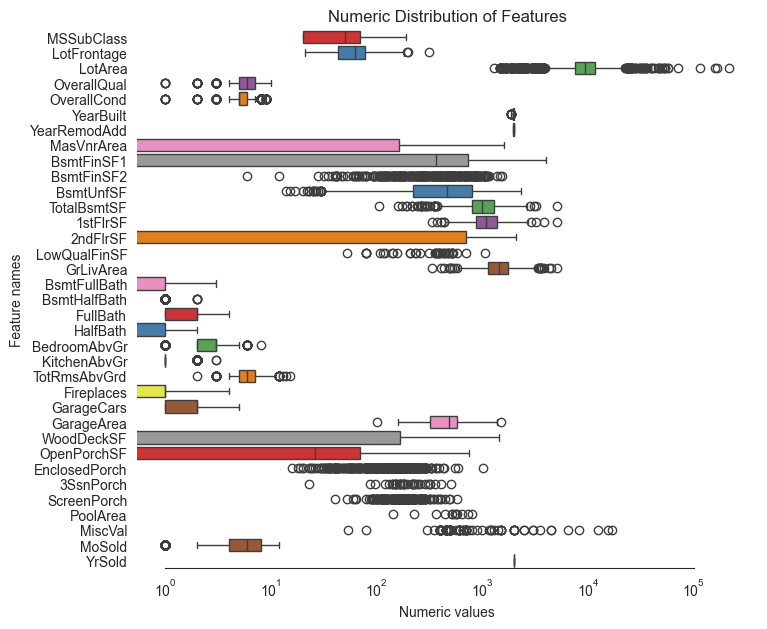

In [25]:
#######################################
# Create box plots for all numeric features
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=features[numeric] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [26]:
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
# Find skewed numerical features
skew_features = features[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 25 numerical features with Skew > 0.5 :


MiscVal          21.928383
PoolArea         17.679480
LotArea          13.260279
LowQualFinSF     12.078203
3SsnPorch        11.366100
KitchenAbvGr      4.297992
BsmtFinSF2        4.152908
EnclosedPorch     4.000022
ScreenPorch       3.942711
BsmtHalfBath      3.927598
dtype: float64

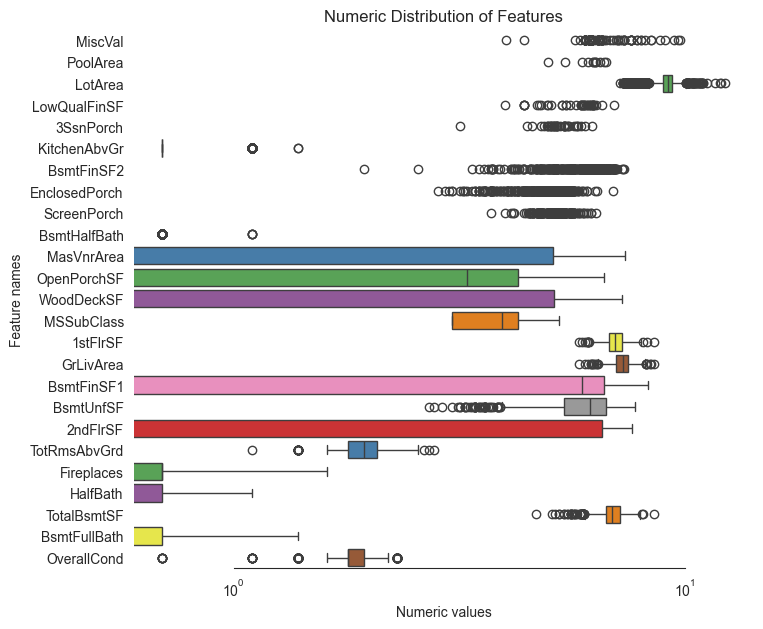

In [27]:
# Normalize skewed features
for i in skew_index:
    features[i] = np.log1p(features[i])

sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=features[skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

## create new features

In [28]:
features['TotalSF']=features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
features['TotalSqrFootage'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] + features['1stFlrSF'] + features['2ndFlrSF'])
features['TotalBathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) + features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))
# Age of the house when sold
features['HouseAge'] = features['YrSold'] - features['YearBuilt']
# Age since last remodel
features['YearsSinceRemodel'] = features['YrSold'] - features['YearRemodAdd']


# Simplified feature for central air
features['HasPool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['Has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
features['HasGarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
features['HasBsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

features.shape

(2914, 414)

In [29]:
final_features = features

In [30]:
final_features.shape

(2914, 414)

In [31]:
final_train_feature = final_features.iloc[:1455, :]
final_test_feature = final_features.iloc[len(final_train_feature):, :]
final_train_feature.shape, final_test_feature.shape, train_result.shape

((1455, 414), (1459, 414), (1455,))

# Model Training

In [32]:
# final train feature
# final test feature
# train result

## cross validation
https://www.kaggle.com/code/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition#Encode-categorical-features

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [34]:
# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)

### evaluation metrics

In [35]:
# Define error metrics
X = np.log1p(final_train_feature)
y = np.log1p(train_result)

# Apply log transformation
X_test = final_test_feature.apply(pd.to_numeric, errors='coerce')
X_test = X_test.fillna(1e-6)
X_test = X_test.clip(lower=1e-6)
X_test = X_test.applymap(lambda x: np.log1p(x) if np.isfinite(x) else 0)

In [36]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

## Hyperparameter tuning on different models(GridSearchCV)
https://www.kaggle.com/code/jesucristo/1-house-prices-solution-top-1#Models

In [37]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from mlxtend.regressor import StackingCVRegressor
# from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV

In [38]:
# Define parameter grids for tuning
param_grids = {
    'lasso': {
        'model__alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01]
    },
    'decision_tree': {
        'model__max_depth': [3, 5, 10, None],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 5]
    },
    'svr': {
        'model__C': [1, 10, 20],
        'model__epsilon': [0.001, 0.01, 0.1],
        'model__gamma': ['scale', 0.001, 0.0003]
    },
    'knn': {
        'model__n_neighbors': [3, 5, 7, 9, 11],
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2]  # 1: Manhattan, 2: Euclidean
    },
}

In [39]:
# Base models with pipelines
models = {
    'lasso': Pipeline([
        ('scaler', RobustScaler()),
        ('model', Lasso(random_state=42))
    ]),
    'decision_tree': Pipeline([
        ('model', DecisionTreeRegressor(random_state=42))
    ]),
    'svr': Pipeline([
        ('scaler', RobustScaler()),
        ('model', SVR())
    ]),
    'knn': Pipeline([
        ('scaler', RobustScaler()),  # Handle scaling
        ('model', KNeighborsRegressor())
    ])
}

In [40]:
# Tune each model
tuned_models = {}
for model_name, pipeline in models.items():
    print(f"Tuning {model_name}...")
    grid = GridSearchCV(estimator=pipeline, param_grid=param_grids[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X, y)
    tuned_models[model_name] = grid.best_estimator_
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    print(f"Best CV score for {model_name}: {grid.best_score_}")
print("Finish tuning.")

# Tuning lasso...
# Best parameters for lasso: {'model__alpha': 0.0005}
# Best CV score for lasso: -0.013220234926020305
# Tuning decision_tree...
# Best parameters for decision_tree: {'model__max_depth': 10, 'model__min_samples_leaf': 5, 'model__min_samples_split': 2}
# Best CV score for decision_tree: -0.03477321855507474
# Tuning svr...
# Best parameters for svr: {'model__C': 20, 'model__epsilon': 0.01, 'model__gamma': 0.0003}
# Best CV score for svr: -0.01304639760394804
# Tuning knn...
# Best parameters for knn: {'model__n_neighbors': 7, 'model__p': 1, 'model__weights': 'distance'}
# Best CV score for knn: -0.02722346709961266
# Finish tuning.


Tuning lasso...
Best parameters for lasso: {'model__alpha': 0.0005}
Best CV score for lasso: -0.013220327722121967
Tuning decision_tree...
Best parameters for decision_tree: {'model__max_depth': None, 'model__min_samples_leaf': 5, 'model__min_samples_split': 2}
Best CV score for decision_tree: -0.03481453203521454
Tuning svr...
Best parameters for svr: {'model__C': 20, 'model__epsilon': 0.01, 'model__gamma': 0.0003}
Best CV score for svr: -0.013048700710038308
Tuning knn...
Best parameters for knn: {'model__n_neighbors': 9, 'model__p': 1, 'model__weights': 'distance'}
Best CV score for knn: -0.027234268293062393
Finish tuning.


In [41]:
## Lasso Regression
lasso = make_pipeline(
    RobustScaler(),
    Lasso(alpha=0.0005, random_state=42)
)

## Decision Tree
decision_tree = make_pipeline(
    RobustScaler(),
    DecisionTreeRegressor(
        max_depth=10,  # Optimal value found
        min_samples_split=2,  # Optimal value found
        min_samples_leaf=5,  # Optimal value found
        random_state=42
    )
)

# Support Vector Regressor
svr = make_pipeline(
    RobustScaler(),
    SVR(
        C=20,  # Optimal value found
        epsilon=0.01,  # Optimal value found
        gamma=0.0003  # Optimal value found
    )
)

# K-Nearest Neighbors Regressor
knn = make_pipeline(
    RobustScaler(),
    KNeighborsRegressor(
        n_neighbors=7,  # Optimal value found
        weights='distance',  # Optimal value found
        metric='minkowski',
        p=1  # Optimal value found (Manhattan distance)
    )
)

## Gradient Boosting Regressor
gbr = make_pipeline(
    RobustScaler(),
    GradientBoostingRegressor(
        n_estimators=3000, learning_rate=0.05,
        max_depth=4, max_features='sqrt',
        min_samples_leaf=15, min_samples_split=10,
        loss='huber', random_state=42
    )
)

# XGBoost Regressor
xgboost = make_pipeline(
    RobustScaler(),
    XGBRegressor(
        learning_rate=0.01, n_estimators=6000,
        max_depth=4, min_child_weight=0,
        gamma=0.6, subsample=0.7,
        colsample_bytree=0.7, objective='reg:linear',
        nthread=-1, scale_pos_weight=1,
        seed=27, reg_alpha=0.00006, random_state=42
    )
)

# Light Gradient Boosting Regressor
lightgbm = make_pipeline(
    RobustScaler(),
    LGBMRegressor(
        objective='regression', num_leaves=6,
        learning_rate=0.01, n_estimators=7000,
        max_bin=200, bagging_fraction=0.8,
        bagging_freq=4, bagging_seed=8,
        feature_fraction=0.2, feature_fraction_seed=8,
        min_sum_hessian_in_leaf=11, verbose=-1,
        random_state=42
    )
)

# Stack up all the models above, optimized using lasso
stack_gen = StackingCVRegressor(
    regressors=(lasso, decision_tree, gbr, xgboost, lightgbm, svr, knn),
    meta_regressor=svr,
    use_features_in_secondary=True,
    random_state=42
)


## train models
Get cross validation scores for each model

In [42]:
scores = {}
regressors = {"Lasso": lasso, 
              "Decision Tree": decision_tree, 
              "SVR": svr, 
              "KNN Regressor": knn,
              "GB Regressor": gbr,
              "XGB Regressor": xgboost, 
              "LGB Regressor": lightgbm,
             }

for name, regressor in regressors.items():
    score = cv_rmse(regressor)  # Returns an array of cross-validated RMSE scores
    print(f"{name}: {score.mean():.4f} ({score.std():.4f})")
    scores[name] = (score.mean(), score.std())

Lasso: 0.1131 (0.0165)
Decision Tree: 0.1817 (0.0163)
SVR: 0.1117 (0.0149)
KNN Regressor: 0.1636 (0.0171)
GB Regressor: 0.1121 (0.0176)
XGB Regressor: 0.1344 (0.0115)
LGB Regressor: 0.1135 (0.0187)


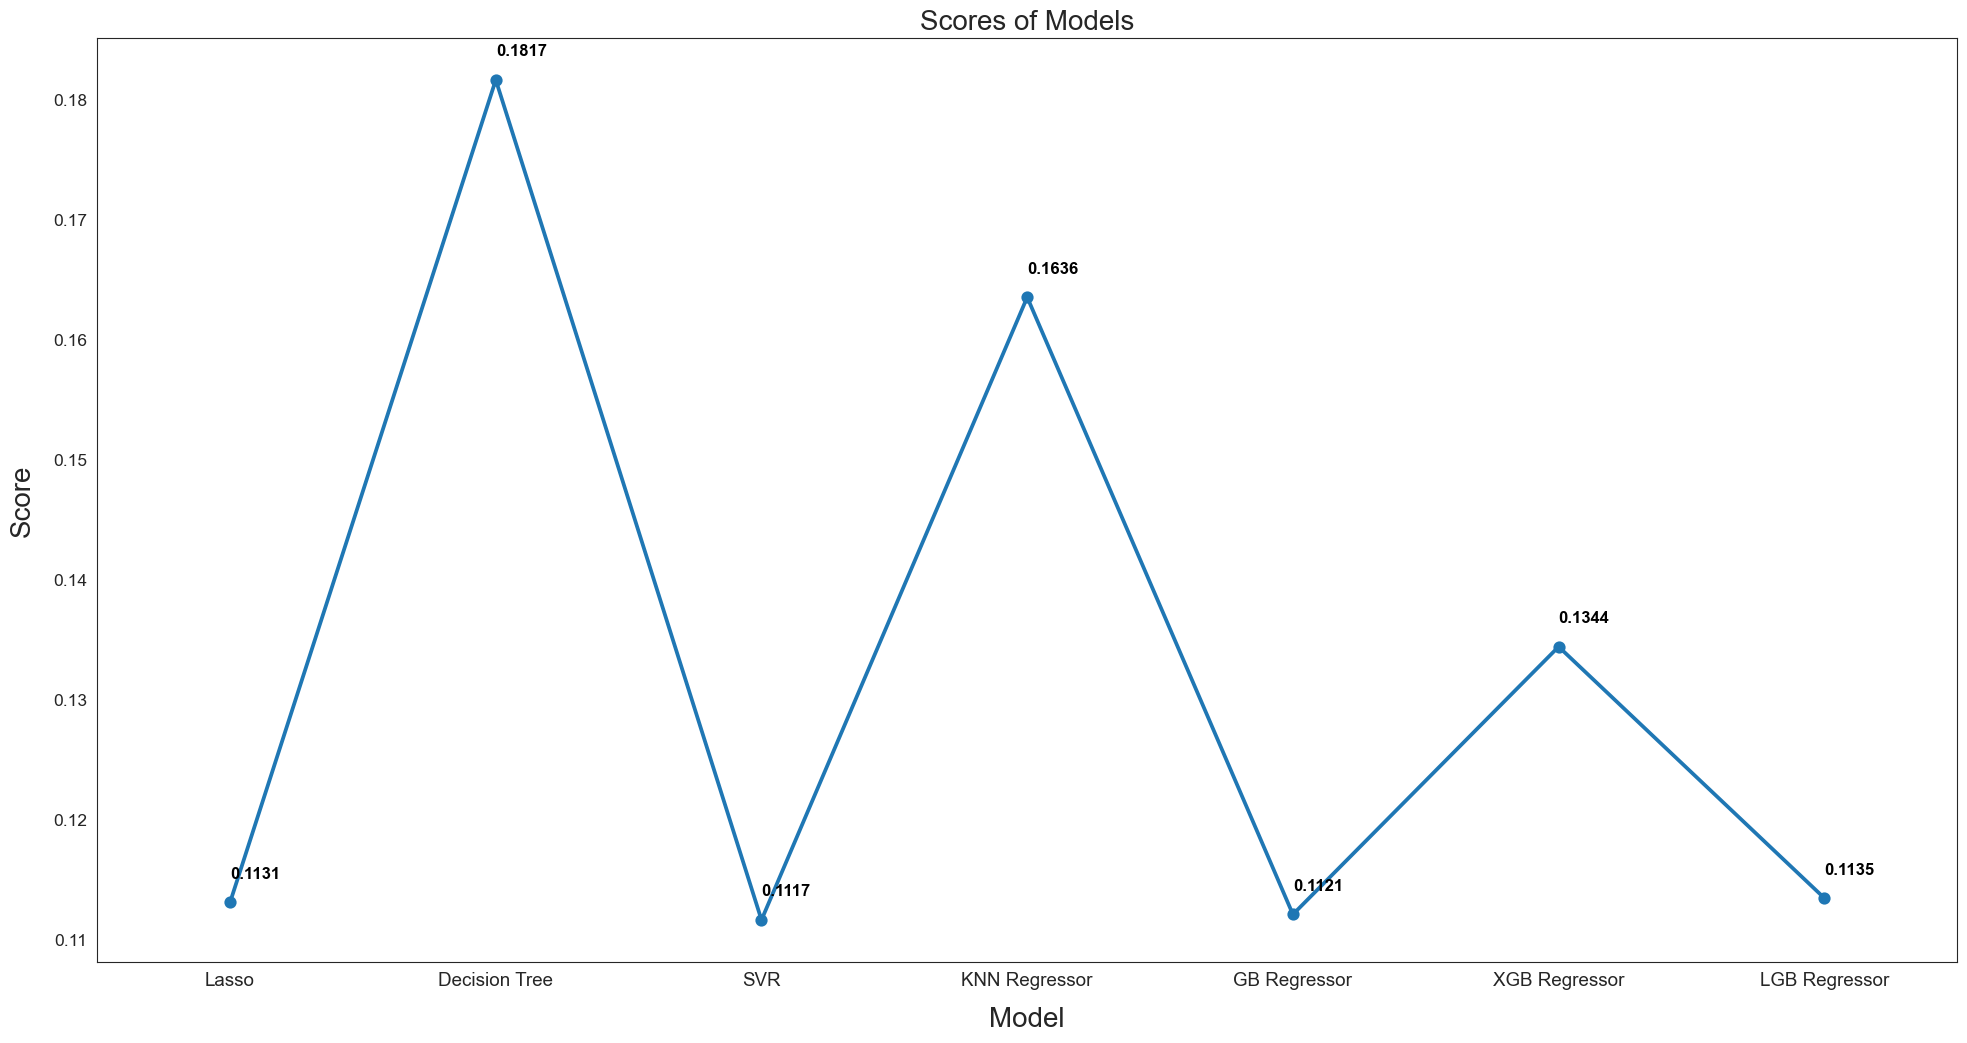

In [43]:
# Extract mean and std scores for plotting
model_names = list(scores.keys())
mean_scores = [scores[n][0] for n in model_names]
std_scores = [scores[n][1] for n in model_names]

# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

# Plot the pointplot
ax = sns.pointplot(x=model_names, y=mean_scores, markers='o', linestyles='-')

# Adding annotations
for i, score in enumerate(mean_scores):
    ax.text(i, score + 0.002, '{:.4f}'.format(score), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

## Fit the model - original data

In [44]:
X_train = temp_features.iloc[:1455, :] 
y_train = train_result # y_train
X_test = temp_features.iloc[len(X_train):, :]

X_original = np.log1p(X_train)
y_original = np.log1p(y_train)
X_test_original = X_test.apply(pd.to_numeric, errors='coerce')
X_test_original = X_test_original.fillna(1e-6)
X_test_original = X_test_original.clip(lower=1e-6)
X_test_original = X_test_original.applymap(lambda x: np.log1p(x) if np.isfinite(x) else 0)


print("Processing lasso with original data...")
lasso_model_original = lasso.fit(X_original, y_original)

print("Processing decision_tree with original data...")
decision_tree_model_original = decision_tree.fit(X_original, y_original)

print("Processing svr with original data...")
svr_model_original = svr.fit(X_original, y_original)

print("Processing knn with original data...")
knn_model_original = knn.fit(X_original, y_original)

print("Processing gbr with original data...")
gbr_model_original = gbr.fit(X_original, y_original)

print("Processing xgboost with original data...")
xgboost_model_original = xgboost.fit(X_original, y_original)

print("Processing lightgbm with original data...")
lightgbm_model_original = lightgbm.fit(X_original, y_original)

print("Processing stack_gen with original data...")
stack_gen_model_original = stack_gen.fit(np.array(X_original), np.array(y_original))

print("Finish processing with original data.")


Processing lasso with original data...
Processing decision_tree with original data...
Processing svr with original data...
Processing knn with original data...
Processing gbr with original data...
Processing xgboost with original data...
Processing lightgbm with original data...
Processing stack_gen with original data...
Finish processing with original data.


## Fit the model - after feature engineering (final one)
feature_train_feature(X), final_test_feature(X_test), train_result(y)

In [45]:
final_train_feature = final_features.iloc[:1455, :]
final_test_feature = final_features.iloc[len(final_train_feature):, :]
# final_train_feature.shape, final_test_feature.shape, train_result.shape

X_final = np.log1p(final_train_feature)
y_final = np.log1p(train_result)
X_test_final = final_test_feature.apply(pd.to_numeric, errors='coerce')
X_test_final = X_test_final.fillna(1e-6)
X_test_final = X_test_final.clip(lower=1e-6)
X_test_final = X_test_final.applymap(lambda x: np.log1p(x) if np.isfinite(x) else 0)

print("Processing lasso ...")
lasso_model = lasso.fit(X_final, y_final)

print("Processing decision_tree ...")
decision_tree_model = decision_tree.fit(X_final, y_final)

print("Processing svr ...")
svr_model = svr.fit(X_final, y_final)

print("Processing knn ...")
knn_model = knn.fit(X_final, y_final)

print("Processing gbr ...")
gbr_model = gbr.fit(X_final, y_final)

print("Processing xgboost ...")
xgboost_model = xgboost.fit(X_final, y_final)

print("Processing lightgbm ...")
lightgbm_model = lightgbm.fit(X_final, y_final)

print("Processing stack_gen ...")
stack_gen_model = stack_gen.fit(np.array(X_final), np.array(y_final))

print("Finish processing with final data.")

Processing lasso ...
Processing decision_tree ...
Processing svr ...
Processing knn ...
Processing gbr ...
Processing xgboost ...
Processing lightgbm ...
Processing stack_gen ...
Finish processing with final data.


In [46]:
# Blend models in order to make the final predictions more robust to overfitting
# based on cross validation score
def blended_predictions_original(X):
    return ((0.15 * lasso_model_original.predict(X)) + \
            (0.15 * svr_model_original.predict(X)) + \
            (0.15 * gbr_model_original.predict(X)) + \
            (0.15 * lightgbm_model_original.predict(X)) + \
            (0.4 * stack_gen_model_original.predict(np.array(X))))

def blended_predictions_final(X):
    return ((0.15 * lasso_model.predict(X)) + \
            (0.15 * svr_model.predict(X)) + \
            (0.15 * gbr_model.predict(X)) + \
            (0.15 * lightgbm_model.predict(X)) + \
            (0.4 * stack_gen_model.predict(np.array(X))))

# Get final precitions from the blended model
blended_score = rmsle(y_original, blended_predictions_original(X_original))
scores['blended_original'] = (blended_score, 0)
print('RMSLE score on train data-original:')
print(blended_score)
# RMSLE score on train data:
# 0.06829440894001784

RMSLE score on train data-original:
0.0715767964537761


In [47]:
# Get final precitions from the blended model
blended_score = rmsle(y_final, blended_predictions_final(X_final))
scores['blended_final'] = (blended_score, 0)
print('RMSLE score on train data-original:')
print(blended_score)

RMSLE score on train data-original:
0.0715767964537761


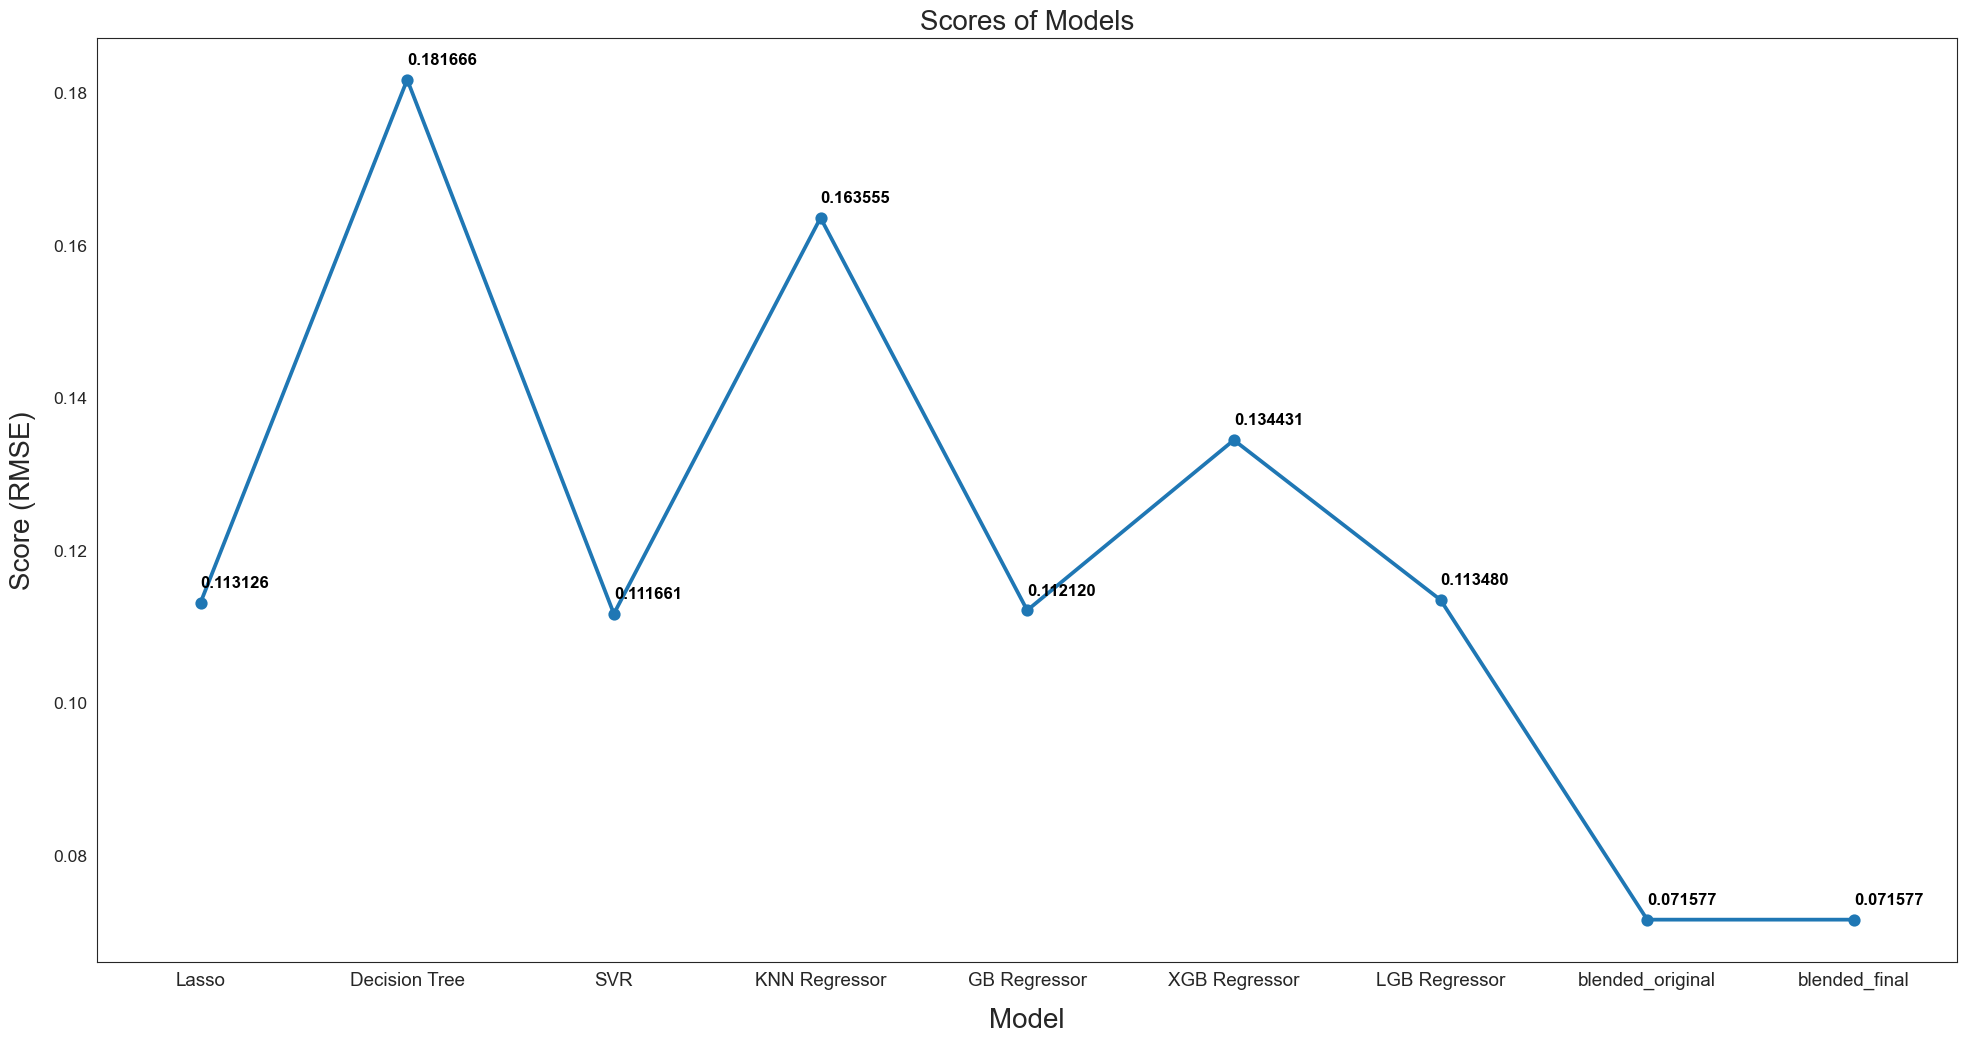

In [48]:
# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers='o', linestyles='-')
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

# Prediction & Submission & Performance

In [49]:
# Prepare the submission DataFrame template
# submission_template = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission_template = pd.read_csv("./input/sample_submission.csv")

## Submission - original data

In [50]:
# Define a dictionary to store prediction methods and their models
models = {
    'lasso': lasso_model_original,
    'DT': decision_tree_model_original,
    'svr': svr_model_original,
    'knn': knn_model_original,
    'gbr': gbr_model_original,
    'xgboost': xgboost_model_original,
    'lightgbm': lightgbm_model_original,  
    'stack': stack_gen_model_original
}

# Loop through each model and create a submission file
for model_name, model in models.items():
    print(f"Generating predictions for {model_name}...")
    
    # Make predictions
    predictions = model.predict(X_test_original)
    
    # If the target was log-transformed, reverse the transformation
    predictions = np.expm1(predictions)
    
    # Apply floor to ensure integer predictions (if required)
    predictions = np.floor(predictions)
    
    # Prepare the submission DataFrame
    submission = submission_template.copy()
    submission['SalePrice'] = predictions
    
    # Save the submission file
    submission_file_name = f"./submission/submission_original_{model_name}.csv"
    submission.to_csv(submission_file_name, index=False)
    print(f"Saved predictions for {model_name} to {submission_file_name}")

print("Finish prediction")

Generating predictions for lasso...
Saved predictions for lasso to ./submission/submission_original_lasso.csv
Generating predictions for DT...
Saved predictions for DT to ./submission/submission_original_DT.csv
Generating predictions for svr...
Saved predictions for svr to ./submission/submission_original_svr.csv
Generating predictions for knn...
Saved predictions for knn to ./submission/submission_original_knn.csv
Generating predictions for gbr...
Saved predictions for gbr to ./submission/submission_original_gbr.csv
Generating predictions for xgboost...
Saved predictions for xgboost to ./submission/submission_original_xgboost.csv
Generating predictions for lightgbm...
Saved predictions for lightgbm to ./submission/submission_original_lightgbm.csv
Generating predictions for stack...
Saved predictions for stack to ./submission/submission_original_stack.csv
Finish prediction


In [51]:
blended_preds = blended_predictions_original(X_test_original)
blended_preds = np.expm1(blended_preds)  # Reverse log transformation
blended_preds = np.floor(blended_preds)  # Floor predictions

submission = submission_template.copy()
submission['SalePrice'] = blended_preds

submission.to_csv("./submission/submission_original_blended.csv", index=False)
print("Saved blended predictions to submission_blended.csv")

Saved blended predictions to submission_blended.csv


### Performance

In [52]:
scores_original = {
    "lasso": 0.12290,
    "DT": 0.19358,
    "SVR": 0.12284,
    "KNN": 0.17308,
    "GBR": 0.12625,
    "XGBoost": 0.16126,
    "LightGBM": 0.15654,
    "Stack": 0.12285,
    "Blended": 0.12206
}

## Submission after feature engineering(final one)

In [53]:
# Define a dictionary to store prediction methods and their models
models_final = {
    'lasso': lasso_model,
    'DT': decision_tree_model,
    'svr': svr_model,
    'knn': knn_model,
    'gbr': gbr_model,
    'xgboost': xgboost_model,
    'lightgbm': lightgbm_model,
    'stack': stack_gen_model
}


# Loop through each model and create a submission file
for model_name, model in models_final.items():
    print(f"Generating predictions for {model_name}...")
    
    # Make predictions
    predictions = model.predict(X_test_final)
    
    # If the target was log-transformed, reverse the transformation
    predictions = np.expm1(predictions)
    
    # Apply floor to ensure integer predictions (if required)
    predictions = np.floor(predictions)
    
    # Prepare the submission DataFrame
    submission = submission_template.copy()
    submission['SalePrice'] = predictions
    
    # Save the submission file
    submission_file_name = f"./submission/submission_final_{model_name}.csv"
    submission.to_csv(submission_file_name, index=False)
    print(f"Saved predictions for {model_name} to {submission_file_name}")

print("Finish prediction after feature engineering")


Generating predictions for lasso...
Saved predictions for lasso to ./submission/submission_final_lasso.csv
Generating predictions for DT...
Saved predictions for DT to ./submission/submission_final_DT.csv
Generating predictions for svr...
Saved predictions for svr to ./submission/submission_final_svr.csv
Generating predictions for knn...
Saved predictions for knn to ./submission/submission_final_knn.csv
Generating predictions for gbr...
Saved predictions for gbr to ./submission/submission_final_gbr.csv
Generating predictions for xgboost...
Saved predictions for xgboost to ./submission/submission_final_xgboost.csv
Generating predictions for lightgbm...
Saved predictions for lightgbm to ./submission/submission_final_lightgbm.csv
Generating predictions for stack...
Saved predictions for stack to ./submission/submission_final_stack.csv
Finish prediction after feature engineering


In [54]:
blended_preds = blended_predictions_final(X_test_final)
blended_preds = np.expm1(blended_preds)  # Reverse log transformation
blended_preds = np.floor(blended_preds)  # Floor predictions

submission = submission_template.copy()
submission['SalePrice'] = blended_preds

submission.to_csv("./submission/submission_final_blended.csv", index=False)
print("Saved blended predictions to submission_final_blended.csv")



Saved blended predictions to submission_final_blended.csv


### Performance

In [55]:
# no normalization(RobustScalar() method)

import matplotlib.pyplot as plt
scores_FE = {
    'lasso': 0.12755,
    'DT': 0.19325,
    'svr': 0.12288,
    'knn': 0.19533,
    'gbr': 0.12577,
    'xgboost': 0.15694,
    'lightgbm': 0.16698, 
    'stack': 0.12226,
    'blended': 0.12142
}


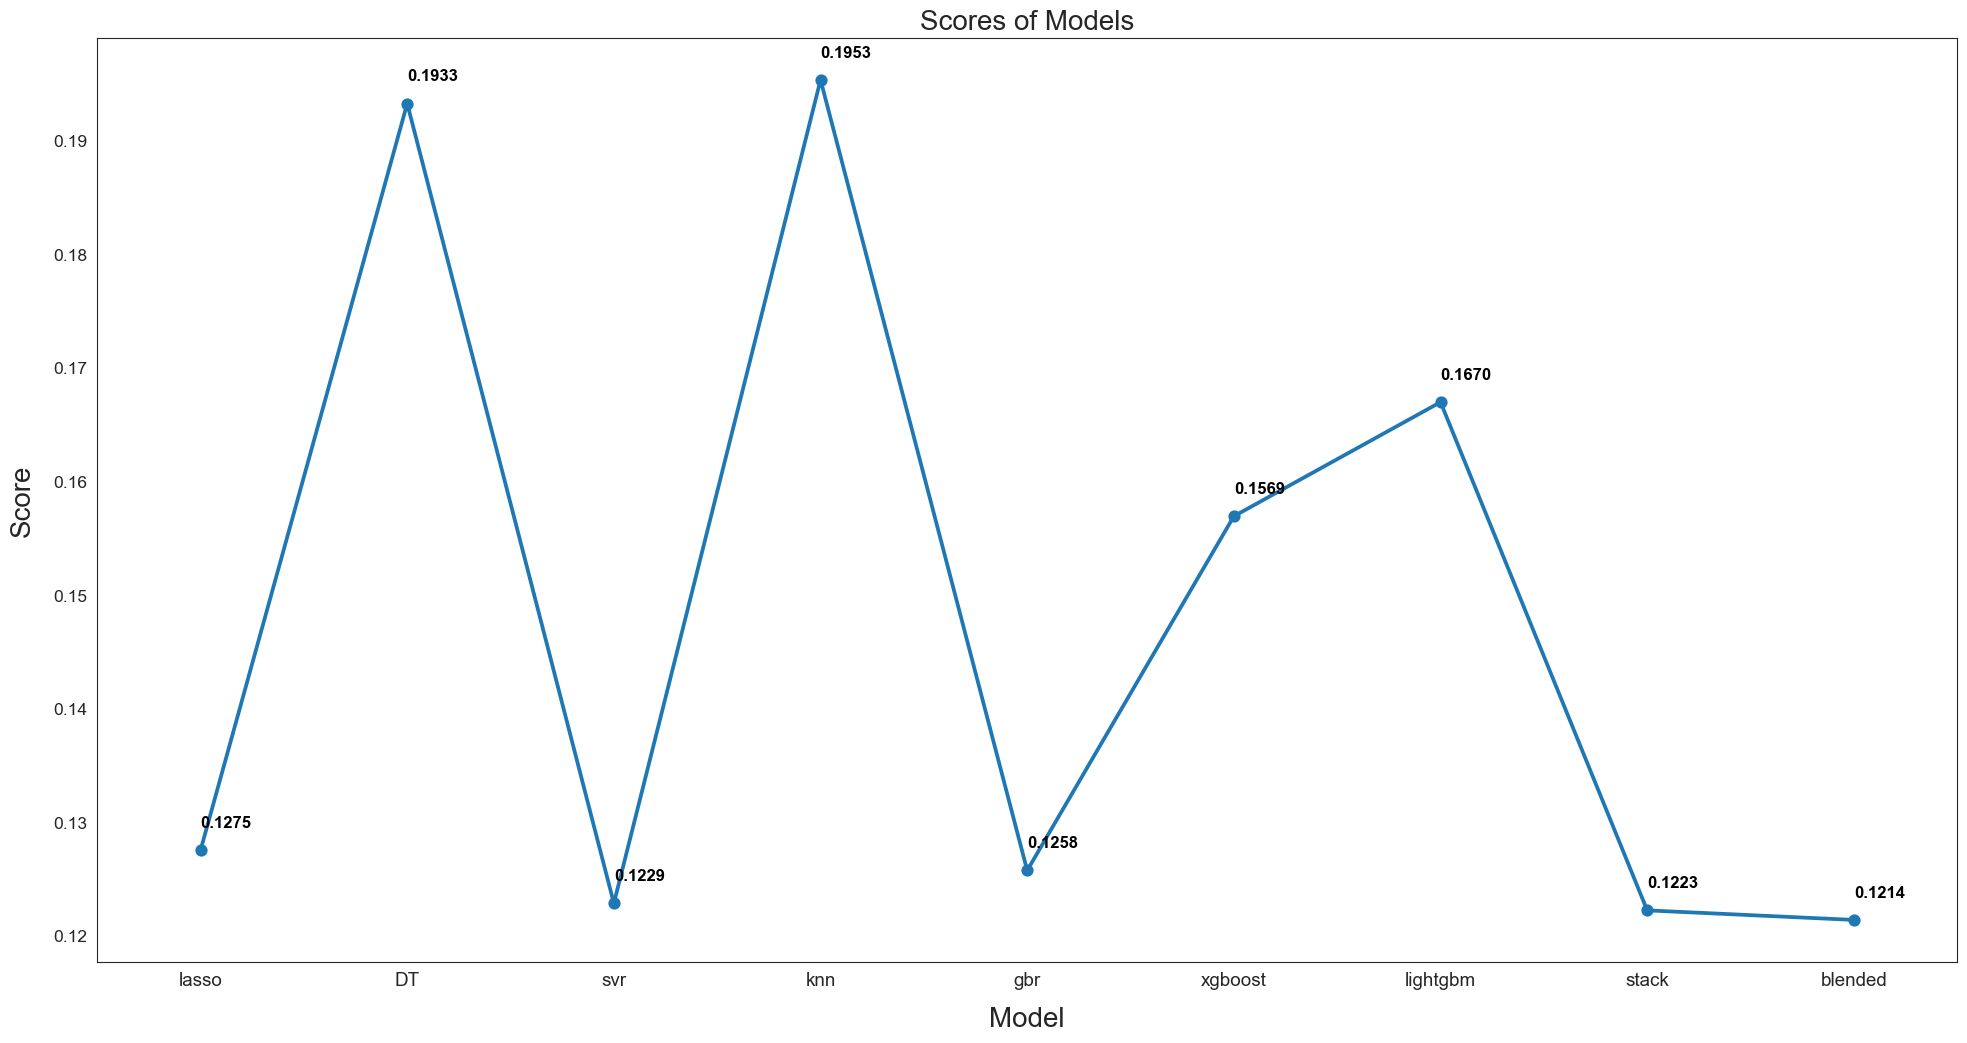

In [56]:
# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

# Plot the pointplot
ax = sns.pointplot(x=list(scores_FE.keys()), y=list(scores_FE.values()), markers='o', linestyles='-')

# Adding annotations
for i, score in enumerate(scores_FE.values()):
    ax.text(i, score + 0.002, '{:.4f}'.format(score), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

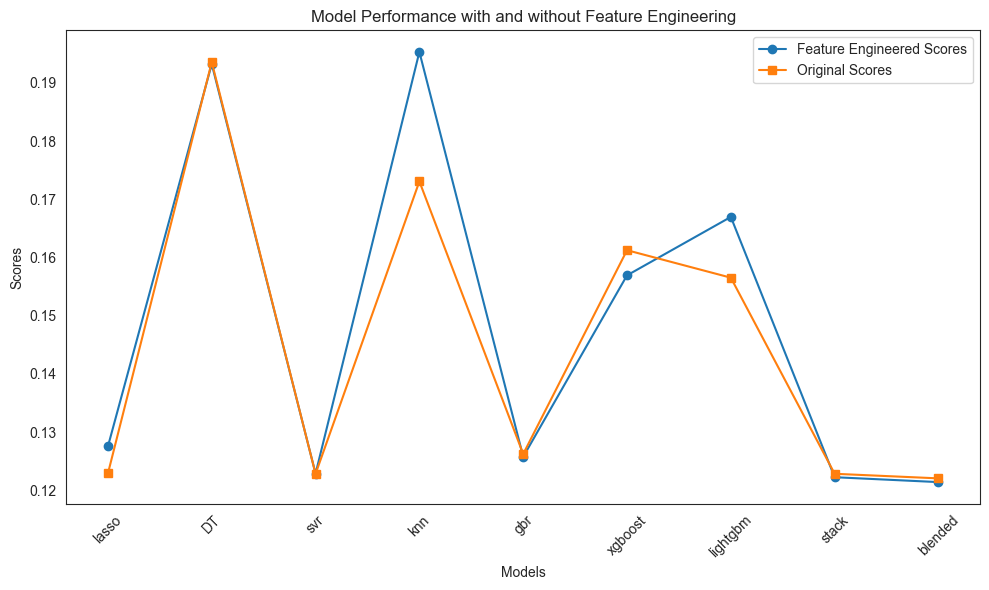

In [57]:
# Prepare data for plotting
models = list(scores_FE.keys())
scores_fe_values = list(scores_FE.values())
scores_original_values = list(scores_original.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(models, scores_fe_values, marker='o', label='Feature Engineered Scores')
plt.plot(models, scores_original_values, marker='s', label='Original Scores')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance with and without Feature Engineering')
plt.legend()
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()